# Deep Learning (DL)

* technically: GPUs (parallelism, simple operation)
* GPU: graphical processing units
* Renaissance of approaches from the 1980's (Rumelhart et al.)
* very successful not only in NLP
* a methodological commitment in NLP by now
* many architectures: Feeedforward (FF), RNN, CNN, LSTM, ...
* word embeddings are crucial for NLP
* learning is minimizing a loss function by an optimizer (e.g. Adam)
* backpropagation as learning method 
* activation functions for non-linearity, e.g. sigmoid und softmax
* hyperparameter tuning (carried out manually) 


## Activation Functions

* activation functions take the input of a node and maps it to a new output value
* in DL, non-linear activation functions are applied

why would we need non-linear activation function?

* because multiplying vectors (matrices) with matrices is just a linear (!) transformation
* (see the script math.pdf in Olat, e.g. the eigenvalue part)
* in order to deal with XOR problems we need non-linear transformations
* examples: sigmoid, softmax, tanh, hard tanh und rectified linear unit (ReLU)

##  Loss Functions

* assign to ($y,\hat{y}$) a value which quantifies the loss the current model makes given the true class (or value) $y$ ($\hat{y}$  is the prediction)
* MSE, Cross Entropy Loss, ...

## Frameworks

provide high-level modules for tasks tightly coupled with DL


* DyNet, Keras, Theano, Tensorflow, Pytorch, ....

## PyTorch

is a Python based framework to specify and train neural nets


NN with PyTorch

* use module nn
* specify a loss function
* specify an optimizer
* define a forward pass
* let torch do the backward pass
* iterate some epochs or until a stopping criterion is met


##  Optimizer

An optimizer combines the loss function with its own way to determine the delta. The loss function defines the loss, the optimizer defines the way to reduce best.

basically,  we have (the delta rule):

$$w_j = w_j + -\eta*\frac{\delta J}{\delta w_j}$$

where J is some loss function and $\eta$ is the learning rate

with the Adam optimizer we have:

$$w_j = w_j + -\eta*\frac{\delta J}{\delta w_j }+ \gamma*v_t$$

where $v_t$ is the last change made to $w_j$ and $\gamma$ is called momentum

The effect is: we are moving down faster 

## Gradients

* we use tensors
* do operations on tensors
* we tell PyTorch to remember the operations
* we tell PyTorch to do the backward pass

e.g. torch.randn(3, 5, requires_grad=True)

* a matrix with 3 rows and 5 columns
* 'requires_grad=True' means that PyTorch keeps track of the operations we carry out

In [1]:
import torch
torch.randn(3, 5, requires_grad=True)

tensor([[-0.6136, -0.9425, -2.0540, -0.2329, -0.8626],
        [-0.4182,  1.4902, -1.3263, -0.5020, -1.6381],
        [ 0.2293,  0.5118, -0.4886,  1.4376, -0.2153]], requires_grad=True)

# Some activaton functions

### sigmoid

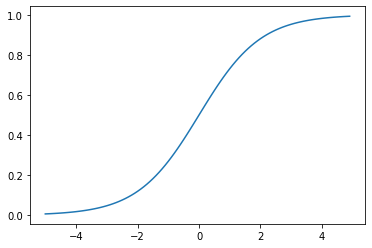

In [2]:
import torch
import matplotlib.pyplot as plt

x = torch.arange(-5., 5., 0.1)
y = torch.sigmoid(x)
plt.plot(x.numpy(), y.detach().numpy())
plt.show()

### tanh

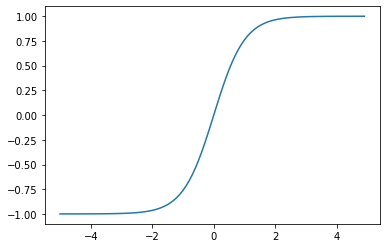

In [3]:
import torch
import matplotlib.pyplot as plt

x = torch.arange(-5., 5., 0.1)
y = torch.tanh(x)

plt.plot(x.numpy(), y.detach().numpy())
plt.show()

### relu

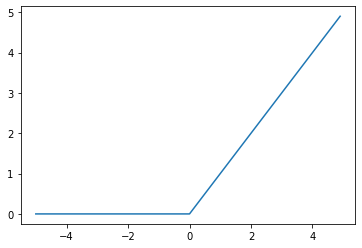

In [4]:
import torch
import matplotlib.pyplot as plt

relu = torch.nn.ReLU()
x = torch.arange(-5., 5., 0.1)
y = relu(x)

plt.plot(x.numpy(), y.detach().numpy())
plt.show()

## Some loss functions


### MSE (mean squared error)

In [5]:
import torch
import torch.nn as nn

mse_loss = nn.MSELoss()
outputs = torch.randn(3, 5, requires_grad=True)
targets = torch.randn(3, 5)
loss = mse_loss(outputs, targets)
loss.backward()
print(loss)

tensor(2.9965, grad_fn=<MseLossBackward>)


### CrossEntropyLoss

* is used for categorical out
* in learning mode net input is used (i.e. before the application of any activation function)
* requires for each example a class ([1,0,3], since we have 3 rows=examples)

In [6]:
import torch
import torch.nn as nn

ce_loss = nn.CrossEntropyLoss()
outputs = torch.randn(3, 5, requires_grad=True)
targets = torch.tensor([1, 0, 3], dtype=torch.int64)
loss = ce_loss(outputs, targets)
loss.backward()
print (loss)

tensor(2.7423, grad_fn=<NllLossBackward>)


## A simple computation graph

In [7]:
W = torch.tensor([[ 0.2111], [-0.6587]], requires_grad=True)
x = torch.tensor([[1, 0]], dtype=torch.float32, requires_grad=True)
b = torch.tensor([-0.3705], requires_grad=True)

y=torch.matmul(x,W)+b    # a linear mapping y=xW+b

y

tensor([[-0.1594]], grad_fn=<AddBackward0>)

## Linear Transformations

carry out: xW^T+b

In [8]:
import torch.nn as nn

linear_trans = nn.Linear(2,1)   # input dim = 2, output dim = 1

print(linear_trans)

Linear(in_features=2, out_features=1, bias=True)


In [9]:
linear_trans.weight, linear_trans.bias  # weights and bias  are randomly initialized

(Parameter containing:
 tensor([[-0.6407,  0.3967]], requires_grad=True),
 Parameter containing:
 tensor([0.2840], requires_grad=True))

In [10]:
# set your own weights and bias

my_weights=torch.tensor([[0.2111,-0.6587]], requires_grad=True)
my_bias= torch.tensor([-0.3705], requires_grad=True)

linear_trans.weight.data = my_weights
linear_trans.bias.data = my_bias

linear_trans.weight, linear_trans.bias

(Parameter containing:
 tensor([[ 0.2111, -0.6587]], requires_grad=True),
 Parameter containing:
 tensor([-0.3705], requires_grad=True))

In [11]:
# do the linear transformation

print("our input vector x",x)
linear_trans(x),torch.matmul(x,W)+b   # i.e. 0.2111 * 1 + -0.3705  (1,0) * (0.2111,-0.6587)^T + b

our input vector x tensor([[1., 0.]], requires_grad=True)


(tensor([[-0.1594]], grad_fn=<AddmmBackward>),
 tensor([[-0.1594]], grad_fn=<AddBackward0>))

In [12]:
# check it manually, .. is right

0.2111 * 1 + -0.6587 * 0 + -0.3705

-0.1594

# Create neural nets in PyTorch

* we define a class Net, with a linear mapping xW^T+b and a sigmoid activation function
* we define our own weights and bias to have stable output for teaching purposes, normally random
* we instantiate it: net=Net()
* we provide some input [1,0] and look at the output (the sigmoid applied to the linear transformation)
* we define the real target (i.e. output) value 
* define a loss function (MSE) manually
* use as an optimizer SDG (Stochastic Gradient Decent)
* we determine the loss (we don't need it further)
* let Pytorch do the backward pass
* and optimize one step, i.e. altering the weights
* and then we manually do it again in order to understand what happend

In [13]:
import torch
import torch.nn as nn

class Net(nn.Module):   
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(2,1)   # input dim = 2, output dim = 1, i.e. a simple perceptron
        
        # we set weights and bias in order to have stable output for teaching
        my_weights=torch.tensor([[ 0.2, 0.6]], requires_grad=True)
        my_bias= torch.tensor([2.0], requires_grad=True)

        self.fc1.weight.data = my_weights
        self.fc1.bias.data = my_bias
        
    def forward(self, x):
        x = torch.sigmoid(self.fc1(x))  # non-linearity, no perceptron any longer
        return x
    
net=Net()    
net   

Net(
  (fc1): Linear(in_features=2, out_features=1, bias=True)
)

In [14]:
import torch.optim as optim

optimizer = optim.SGD(net.parameters(), lr=0.1)

input = torch.tensor([[1,0]], dtype=torch.float32, requires_grad=True)
target = torch.tensor([[1]], dtype=torch.float32, requires_grad=True)

def criterion(out, label):   # MSE, our own definition of loss/cost function J
    return (label - out)**2

out = net(input)   # forward pass

print("the initial parameters:",list(net.parameters()))

print("\noutput of net=",out)

optimizer.zero_grad()   # reset gradients to zero

loss=criterion(out,target)

print("\nloss i.e. (1-0.9)**2",loss)

loss.backward()

optimizer.step()   # one step weight/bias adaptation

#input.grad

print("\nthe adopted parameters",list(net.parameters()))

print("\nthe gradients:",net.fc1.weight.grad, net.fc1.bias.grad)
# input.grad

the initial parameters: [Parameter containing:
tensor([[0.2000, 0.6000]], requires_grad=True), Parameter containing:
tensor([2.], requires_grad=True)]

output of net= tensor([[0.9002]], grad_fn=<SigmoidBackward>)

loss i.e. (1-0.9)**2 tensor([[0.0100]], grad_fn=<PowBackward0>)

the adopted parameters [Parameter containing:
tensor([[0.2018, 0.6000]], requires_grad=True), Parameter containing:
tensor([2.0018], requires_grad=True)]

the gradients: tensor([[-0.0179,  0.0000]]) tensor([-0.0179])


In [15]:
# backpropagation done manually, i.e. chain rule application

# gradient of w_1 (0.2) is -0.0179 

-2*(1-0.9002)*0.9002*(1-0.9002)*1    

-0.017932056015999998

In [16]:
# determining the new weight w_1 by applying the delta rule (that is SGD)

dx=-0.017932056015999998

w1=0.2
w1=w1 + -(0.1*dx) 
w1          # the new, incremente weight w_1

0.20179320560160002

### Output of net.parameters()

[Parameter containing:
tensor([[0.3100, 0.6000]], requires_grad=True), Parameter containing:
tensor([2.1100], requires_grad=True)]

the new weight matrix [[0.3100, 0.6000]] and the new bias vector [2.1100]

a better version:

In [17]:
for name, param in net.named_parameters():
    if param.requires_grad:
        print("\t",name, param.data)

	 fc1.weight tensor([[0.2018, 0.6000]])
	 fc1.bias tensor([2.0018])


we find: weight 1 is increasing from 0.2 to 0.2018, also the bias term: from 2 to 2.0018

## Adding layers

In [18]:
import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F
import numpy as np

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(2,5)
        self.fc2 = nn.Linear(5,1)
    def forward(self, x):
        x = torch.sigmoid(self.fc2(torch.sigmoid(self.fc1(x))))
        return x


In [19]:
net=Net()
print(net)

Net(
  (fc1): Linear(in_features=2, out_features=5, bias=True)
  (fc2): Linear(in_features=5, out_features=1, bias=True)
)


In [20]:
inputs = torch.tensor([[1, 0], [1, 1], [0, 1], [0, 0]], dtype=torch.float32, requires_grad=True)

net(inputs)

tensor([[0.3695],
        [0.3708],
        [0.3636],
        [0.3635]], grad_fn=<SigmoidBackward>)

In [21]:
import torch.optim as optim

def criterion(out, label):
    return (label - out)**2

optimizer = optim.SGD(net.parameters(), lr=0.1, momentum=0.5)

In [22]:
#net=Net()

data = [[1, 0, 0], [1, 1, 0], [0, 1, 1], [0, 0, 0]] 

for epoch in range(1400):
    for i, data2 in enumerate(data):
        optimizer.zero_grad()
        X1, X2, Y = iter(data2)
        X, Y = Variable(torch.FloatTensor([X1,X2]), requires_grad=True), Variable(torch.FloatTensor([Y]), requires_grad=False)
#        print(X,Y)
        outputs = net(X)
        loss = criterion(outputs, Y)
        loss.backward()
        optimizer.step()
        if (i % 10 == 0):
            print("Epoch {} - loss: {}".format(epoch, loss.data[0]))


Epoch 0 - loss: 0.13654197752475739
Epoch 1 - loss: 0.12687072157859802
Epoch 2 - loss: 0.11677262932062149
Epoch 3 - loss: 0.10854895412921906
Epoch 4 - loss: 0.101885125041008
Epoch 5 - loss: 0.09642040729522705
Epoch 6 - loss: 0.09188511967658997
Epoch 7 - loss: 0.08808078616857529
Epoch 8 - loss: 0.08485930413007736
Epoch 9 - loss: 0.08210834860801697
Epoch 10 - loss: 0.07974158972501755
Epoch 11 - loss: 0.07769157737493515
Epoch 12 - loss: 0.07590501010417938
Epoch 13 - loss: 0.07433933764696121
Epoch 14 - loss: 0.07296012341976166
Epoch 15 - loss: 0.07173925638198853
Epoch 16 - loss: 0.07065361738204956
Epoch 17 - loss: 0.06968402862548828
Epoch 18 - loss: 0.06881438195705414
Epoch 19 - loss: 0.0680311918258667
Epoch 20 - loss: 0.06732300668954849
Epoch 21 - loss: 0.06668000668287277
Epoch 22 - loss: 0.06609389185905457
Epoch 23 - loss: 0.06555741280317307
Epoch 24 - loss: 0.06506440043449402
Epoch 25 - loss: 0.06460940092802048
Epoch 26 - loss: 0.06418775767087936
Epoch 27 - los

Epoch 226 - loss: 0.000780762464273721
Epoch 227 - loss: 0.0007559017976745963
Epoch 228 - loss: 0.0007319911383092403
Epoch 229 - loss: 0.0007089891005307436
Epoch 230 - loss: 0.0006868583150207996
Epoch 231 - loss: 0.0006655612378381193
Epoch 232 - loss: 0.0006450630025938153
Epoch 233 - loss: 0.0006253299652598798
Epoch 234 - loss: 0.0006063300534151495
Epoch 235 - loss: 0.0005880336393602192
Epoch 236 - loss: 0.0005704101640731096
Epoch 237 - loss: 0.0005534313968382776
Epoch 238 - loss: 0.0005370721919462085
Epoch 239 - loss: 0.0005213061231188476
Epoch 240 - loss: 0.0005061082192696631
Epoch 241 - loss: 0.0004914571181870997
Epoch 242 - loss: 0.0004773284599650651
Epoch 243 - loss: 0.00046370207564905286
Epoch 244 - loss: 0.00045055715600028634
Epoch 245 - loss: 0.0004378744924906641
Epoch 246 - loss: 0.00042563548777252436
Epoch 247 - loss: 0.0004138221265748143
Epoch 248 - loss: 0.00040241784881800413
Epoch 249 - loss: 0.0003914053086191416
Epoch 250 - loss: 0.00038077062345109

Epoch 434 - loss: 1.9888979295501485e-05
Epoch 435 - loss: 1.970340235857293e-05
Epoch 436 - loss: 1.9520304704201408e-05
Epoch 437 - loss: 1.9339679056429304e-05
Epoch 438 - loss: 1.9161472664563917e-05
Epoch 439 - loss: 1.898568734759465e-05
Epoch 440 - loss: 1.8812252164934762e-05
Epoch 441 - loss: 1.8641048882273026e-05
Epoch 442 - loss: 1.8472157535143197e-05
Epoch 443 - loss: 1.830551991588436e-05
Epoch 444 - loss: 1.8141021428164095e-05
Epoch 445 - loss: 1.797869845177047e-05
Epoch 446 - loss: 1.781848186510615e-05
Epoch 447 - loss: 1.7660364392213523e-05
Epoch 448 - loss: 1.750427509250585e-05
Epoch 449 - loss: 1.7350226698908955e-05
Epoch 450 - loss: 1.7198131899931468e-05
Epoch 451 - loss: 1.7047979781636968e-05
Epoch 452 - loss: 1.6899750335142016e-05
Epoch 453 - loss: 1.6753398085711524e-05
Epoch 454 - loss: 1.6608919395366684e-05
Epoch 455 - loss: 1.646623968554195e-05
Epoch 456 - loss: 1.6325348042300902e-05
Epoch 457 - loss: 1.6186215361813083e-05
Epoch 458 - loss: 1.604

Epoch 643 - loss: 5.006394530937541e-06
Epoch 644 - loss: 4.982774953532498e-06
Epoch 645 - loss: 4.959331818099599e-06
Epoch 646 - loss: 4.936041023029247e-06
Epoch 647 - loss: 4.912929853162495e-06
Epoch 648 - loss: 4.889987394562922e-06
Epoch 649 - loss: 4.8672086450096685e-06
Epoch 650 - loss: 4.844580416829558e-06
Epoch 651 - loss: 4.822121354663977e-06
Epoch 652 - loss: 4.799826456292067e-06
Epoch 653 - loss: 4.7776857172721066e-06
Epoch 654 - loss: 4.755699137604097e-06
Epoch 655 - loss: 4.7338635340565816e-06
Epoch 656 - loss: 4.712191639555385e-06
Epoch 657 - loss: 4.690668447437929e-06
Epoch 658 - loss: 4.669290774472756e-06
Epoch 659 - loss: 4.648069534596289e-06
Epoch 660 - loss: 4.62699654235621e-06
Epoch 661 - loss: 4.606062702805502e-06
Epoch 662 - loss: 4.585280748869991e-06
Epoch 663 - loss: 4.564643404592061e-06
Epoch 664 - loss: 4.5441520342137665e-06
Epoch 665 - loss: 4.523790721577825e-06
Epoch 666 - loss: 4.503580839809729e-06
Epoch 667 - loss: 4.4835082917416e-06

Epoch 867 - loss: 2.171519099647412e-06
Epoch 868 - loss: 2.165081014027237e-06
Epoch 869 - loss: 2.1586745333479485e-06
Epoch 870 - loss: 2.152294655388687e-06
Epoch 871 - loss: 2.145948656107066e-06
Epoch 872 - loss: 2.139633124897955e-06
Epoch 873 - loss: 2.133338284693309e-06
Epoch 874 - loss: 2.1270820980134886e-06
Epoch 875 - loss: 2.120848421327537e-06
Epoch 876 - loss: 2.1146493054402526e-06
Epoch 877 - loss: 2.108476110151969e-06
Epoch 878 - loss: 2.1023308818257647e-06
Epoch 879 - loss: 2.0962133930879645e-06
Epoch 880 - loss: 2.0901236439385684e-06
Epoch 881 - loss: 2.0840641354880063e-06
Epoch 882 - loss: 2.0780294107680675e-06
Epoch 883 - loss: 2.0720242446259363e-06
Epoch 884 - loss: 2.066046135951183e-06
Epoch 885 - loss: 2.060095084743807e-06
Epoch 886 - loss: 2.05416904464073e-06
Epoch 887 - loss: 2.04827210836811e-06
Epoch 888 - loss: 2.042403139057569e-06
Epoch 889 - loss: 2.0365550881251693e-06
Epoch 890 - loss: 2.0307395516283577e-06
Epoch 891 - loss: 2.02494402401

Epoch 1080 - loss: 1.267979769181693e-06
Epoch 1081 - loss: 1.2652456007344881e-06
Epoch 1082 - loss: 1.2625210956684896e-06
Epoch 1083 - loss: 1.2598069361047237e-06
Epoch 1084 - loss: 1.257101303053787e-06
Epoch 1085 - loss: 1.2544049923235434e-06
Epoch 1086 - loss: 1.2517168670456158e-06
Epoch 1087 - loss: 1.2490404515119735e-06
Epoch 1088 - loss: 1.2463697203202173e-06
Epoch 1089 - loss: 1.2437081977623166e-06
Epoch 1090 - loss: 1.2410595218170783e-06
Epoch 1091 - loss: 1.2384189176373184e-06
Epoch 1092 - loss: 1.2357849072941463e-06
Epoch 1093 - loss: 1.2331626066952595e-06
Epoch 1094 - loss: 1.2305479231145e-06
Epoch 1095 - loss: 1.2279434713491355e-06
Epoch 1096 - loss: 1.225345954480872e-06
Epoch 1097 - loss: 1.222759692609543e-06
Epoch 1098 - loss: 1.220182411998394e-06
Epoch 1099 - loss: 1.2176102472949424e-06
Epoch 1100 - loss: 1.2150484280937235e-06
Epoch 1101 - loss: 1.2124955901526846e-06
Epoch 1102 - loss: 1.2099523019060143e-06
Epoch 1103 - loss: 1.2074145843143924e-06


Epoch 1280 - loss: 8.643359024063102e-07
Epoch 1281 - loss: 8.628630325802078e-07
Epoch 1282 - loss: 8.613951649749652e-07
Epoch 1283 - loss: 8.599299121669901e-07
Epoch 1284 - loss: 8.584694910496182e-07
Epoch 1285 - loss: 8.570130489715666e-07
Epoch 1286 - loss: 8.55560699619673e-07
Epoch 1287 - loss: 8.541127272110316e-07
Epoch 1288 - loss: 8.526669148523069e-07
Epoch 1289 - loss: 8.512285489814531e-07
Epoch 1290 - loss: 8.497918315697461e-07
Epoch 1291 - loss: 8.483589795105217e-07
Epoch 1292 - loss: 8.469303907077119e-07
Epoch 1293 - loss: 8.455064062218298e-07
Epoch 1294 - loss: 8.440857754976605e-07
Epoch 1295 - loss: 8.426683280049474e-07
Epoch 1296 - loss: 8.412563943238638e-07
Epoch 1297 - loss: 8.398477575610741e-07
Epoch 1298 - loss: 8.384420766560652e-07
Epoch 1299 - loss: 8.370396358259313e-07
Epoch 1300 - loss: 8.356418561561441e-07
Epoch 1301 - loss: 8.342481692125148e-07
Epoch 1302 - loss: 8.32858347621368e-07
Epoch 1303 - loss: 8.314715387314209e-07
Epoch 1304 - loss:

In [23]:
print(net(Variable(torch.Tensor([[[1,1]]]))))

tensor([[[0.0254]]], grad_fn=<SigmoidBackward>)


In [24]:
def step(x):
    if x<0.5:
        return 0
    else:
        return 1
    
print(step(net(Variable(torch.Tensor([[[1,0]]])))))

0
